In [29]:
from __future__ import division
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import ResNet50
from keras.applications import MobileNet
from keras.applications import VGG16
from keras.preprocessing import image
from keras.applications.resnet_v2 import preprocess_input
from keras.applications.mobilenet import preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [13]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

In [14]:
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 8} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [15]:
input_shape = (224, 224, 3)
#base_model=ResNet50(weights='imagenet',include_top=False) #imports the ResNet50V2 model and discards the last 1000 neuron layer.
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
#x=Dense(256,activation='relu')(x) #dense layer 4
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation

C:\Users\yotam hermon\Anaconda3\envs\py36\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [16]:
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

In [17]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [18]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('../data/train/classification/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=16,
                                                 class_mode='categorical',                                                 
                                                 shuffle=True)

Found 2970 images belonging to 2 classes.


In [19]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
history = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=5)

Epoch 1/5
185/185 [==============================] - 44s 237ms/step - loss: 0.5474 - accuracy: 0.8334
Epoch 2/5
185/185 [==============================] - 39s 211ms/step - loss: 0.4471 - accuracy: 0.8385
Epoch 3/5
185/185 [==============================] - 39s 211ms/step - loss: 0.4197 - accuracy: 0.8402
Epoch 4/5
185/185 [==============================] - 39s 211ms/step - loss: 0.4181 - accuracy: 0.8412
Epoch 5/5
185/185 [==============================] - 39s 211ms/step - loss: 0.3948 - accuracy: 0.8395


In [20]:
print (model.summary())

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [21]:
def validation(model, train_datagen):
    #model=Model(inputs=base_model.input,outputs=preds)
    #model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    val_generator=train_datagen.flow_from_directory('../data/validation/', # this is where you specify the path to the main data folder
                                                     target_size=(224,224),
                                                     color_mode='rgb',
                                                     batch_size=16,
                                                     class_mode='categorical',                                                 
                                                     shuffle=True)

    step_size_val=val_generator.n//val_generator.batch_size
    history1 = model.fit_generator(generator=val_generator,
                       steps_per_epoch=step_size_val,
                       epochs=5)
    return history1

In [22]:
history1 = validation(model,train_datagen)

Found 120 images belonging to 2 classes.
Epoch 1/5
7/7 [==============================] - 2s 296ms/step - loss: 0.8320 - accuracy: 0.5481
Epoch 2/5
7/7 [==============================] - 2s 221ms/step - loss: 0.6562 - accuracy: 0.5625
Epoch 3/5
7/7 [==============================] - 1s 200ms/step - loss: 0.6665 - accuracy: 0.5833
Epoch 4/5
7/7 [==============================] - 2s 221ms/step - loss: 0.6245 - accuracy: 0.6696
Epoch 5/5
7/7 [==============================] - 1s 210ms/step - loss: 0.5567 - accuracy: 0.6442


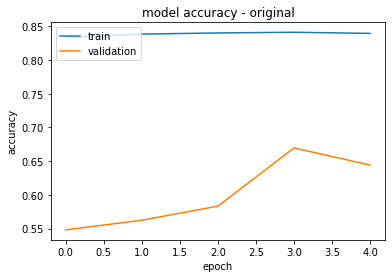

In [23]:
#history = model.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history1.history['accuracy'])
plt.title('model accuracy - original')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

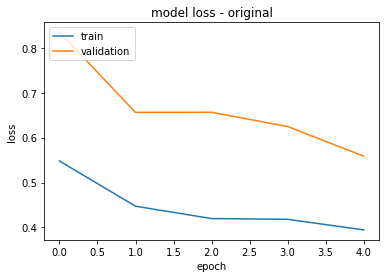

In [24]:
plt.plot(history.history['loss'])
plt.plot(history1.history['loss'])
plt.title('model loss - original')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [4]:
base_model_mn=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model_mn.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
#x=Dense(256,activation='relu')(x) #dense layer 4
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation

C:\Users\yotam hermon\Anaconda3\envs\py36\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [5]:
model_mn=Model(inputs=base_model_mn.input,outputs=preds)


In [6]:
for layer in model_mn.layers[:20]:
    layer.trainable=False
for layer in model_mn.layers[20:]:
    layer.trainable=True

In [7]:
train_datagen_mn=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator_mn=train_datagen_mn.flow_from_directory('../data/train/classification/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',                                                 
                                                 shuffle=True)

Found 2970 images belonging to 2 classes.


In [8]:
model_mn.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train_mn=train_generator_mn.n//train_generator_mn.batch_size
history_mn = model_mn.fit_generator(generator=train_generator_mn,
                   steps_per_epoch=step_size_train_mn,
                   epochs=5)


Epoch 1/5
92/92 [==============================] - 14s 149ms/step - loss: 0.4846 - accuracy: 0.8397
Epoch 2/5
92/92 [==============================] - 10s 109ms/step - loss: 0.3675 - accuracy: 0.8475
Epoch 3/5
92/92 [==============================] - 10s 110ms/step - loss: 0.3199 - accuracy: 0.8645
Epoch 4/5
92/92 [==============================] - 10s 110ms/step - loss: 0.2986 - accuracy: 0.8636
Epoch 5/5
92/92 [==============================] - 10s 110ms/step - loss: 0.2401 - accuracy: 0.9050


In [11]:
history1_mn = validation(model_mn,train_datagen_mn)

Found 120 images belonging to 2 classes.
Epoch 1/5
7/7 [==============================] - ETA: 0s - loss: 1.1570 - accuracy: 0.53 - 1s 154ms/step - loss: 1.0811 - accuracy: 0.5385
Epoch 2/5
7/7 [==============================] - 0s 59ms/step - loss: 0.6226 - accuracy: 0.7115
Epoch 3/5
7/7 [==============================] - 0s 65ms/step - loss: 0.5261 - accuracy: 0.6875
Epoch 4/5
7/7 [==============================] - 0s 55ms/step - loss: 0.4738 - accuracy: 0.8125
Epoch 5/5
7/7 [==============================] - 0s 65ms/step - loss: 0.4411 - accuracy: 0.8173


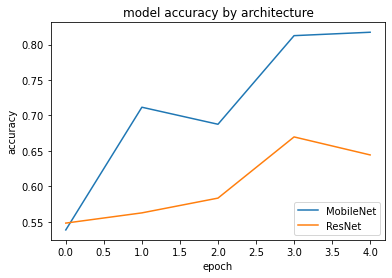

In [25]:
plt.plot(history1_mn.history['accuracy'])
plt.plot(history1.history['accuracy'])
plt.title('model accuracy by architecture')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['MobileNet', 'ResNet'], loc='lower right')
plt.show()

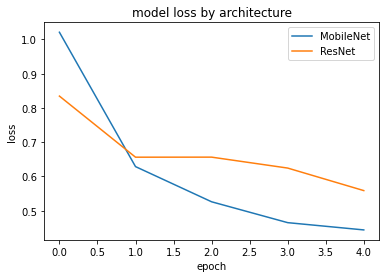

In [27]:
plt.plot(history1_mn.history['loss'])
plt.plot(history1.history['loss'])
plt.title('model loss by architecture')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['MobileNet', 'ResNet'], loc='upper right')
plt.show()

In [32]:
base_model_vgg=VGG16(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model_vgg.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
#x=Dense(256,activation='relu')(x) #dense layer 4
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation

In [33]:
model_vgg=Model(inputs=base_model_vgg.input,outputs=preds)

In [35]:
for layer in model_vgg.layers[:20]:
    layer.trainable=False
for layer in model_vgg.layers[20:]:
    layer.trainable=True

In [36]:
train_datagen_vgg=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator_vgg=train_datagen_vgg.flow_from_directory('../data/train/classification/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',                                                 
                                                 shuffle=True)

Found 2970 images belonging to 2 classes.


In [37]:
model_vgg.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train_vgg=train_generator_vgg.n//train_generator_vgg.batch_size
history_vgg = model_vgg.fit_generator(generator=train_generator_vgg,
                   steps_per_epoch=step_size_train_vgg,
                   epochs=5)

Epoch 1/5
92/92 [==============================] - 17s 189ms/step - loss: 0.6381 - accuracy: 0.8121
Epoch 2/5
92/92 [==============================] - 14s 148ms/step - loss: 0.4002 - accuracy: 0.8410
Epoch 3/5
92/92 [==============================] - 14s 149ms/step - loss: 0.3779 - accuracy: 0.8424
Epoch 4/5
92/92 [==============================] - 14s 150ms/step - loss: 0.3663 - accuracy: 0.8475
Epoch 5/5
92/92 [==============================] - 14s 150ms/step - loss: 0.3461 - accuracy: 0.8570


In [38]:
history1_vgg = validation(model_vgg,train_datagen_vgg)

Found 120 images belonging to 2 classes.
Epoch 1/5
7/7 [==============================] - 2s 342ms/step - loss: 0.8156 - accuracy: 0.5481
Epoch 2/5
7/7 [==============================] - 1s 76ms/step - loss: 0.5790 - accuracy: 0.7308
Epoch 3/5
7/7 [==============================] - 1s 80ms/step - loss: 0.3943 - accuracy: 0.7788 0s - loss: 0.4728 - accuracy: 
Epoch 4/5
7/7 [==============================] - 1s 76ms/step - loss: 0.4251 - accuracy: 0.7788
Epoch 5/5
7/7 [==============================] - 1s 79ms/step - loss: 0.3281 - accuracy: 0.8571


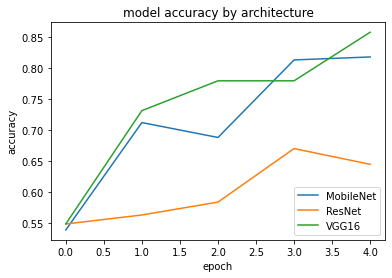

In [39]:
plt.plot(history1_mn.history['accuracy'])
plt.plot(history1.history['accuracy'])
plt.plot(history1_vgg.history['accuracy'])
plt.title('model accuracy by architecture')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['MobileNet', 'ResNet','VGG16'], loc='lower right')
plt.show()

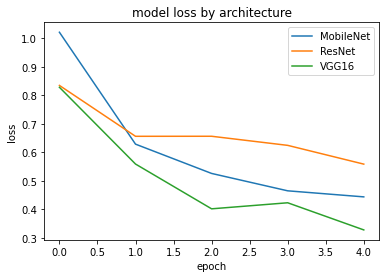

In [40]:
plt.plot(history1_mn.history['loss'])
plt.plot(history1.history['loss'])
plt.plot(history1_vgg.history['loss'])
plt.title('model loss by architecture')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['MobileNet', 'ResNet','VGG16'], loc='upper right')
plt.show()